Scenario 13593759.666666666 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 14616534.69 million €
Scenario 13593759.666666666 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 17614735.47 million €
Scenario 13593759.666666666 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 22112036.64 million €


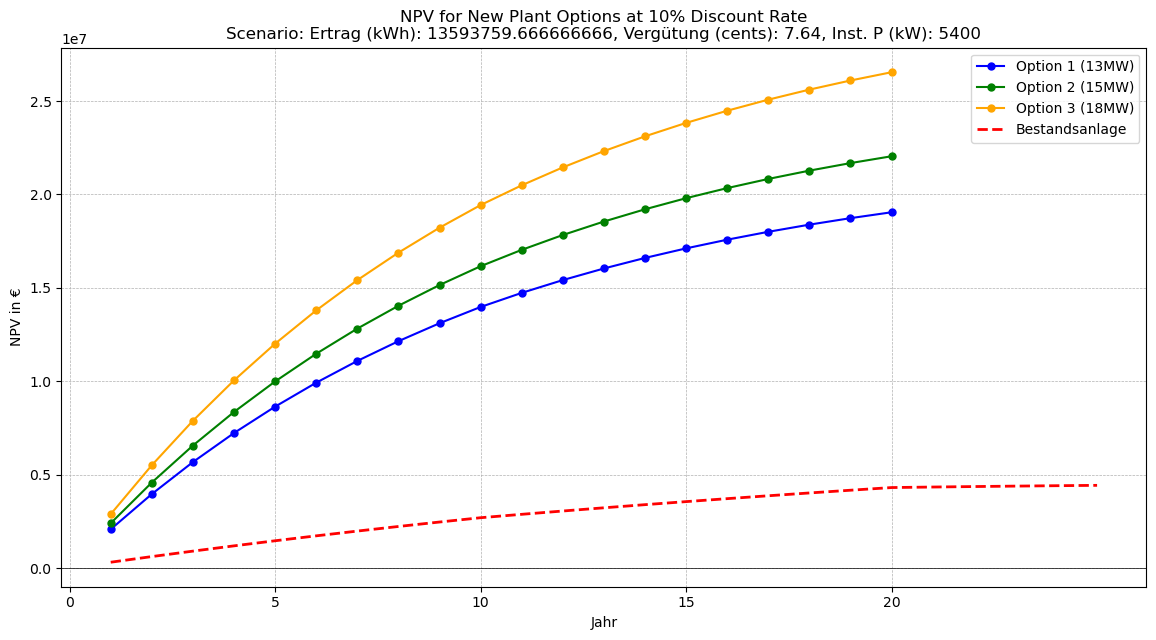

Scenario 11919754.75 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 15795806.05 million €
Scenario 11919754.75 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 18794006.83 million €
Scenario 11919754.75 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 23291308.00 million €


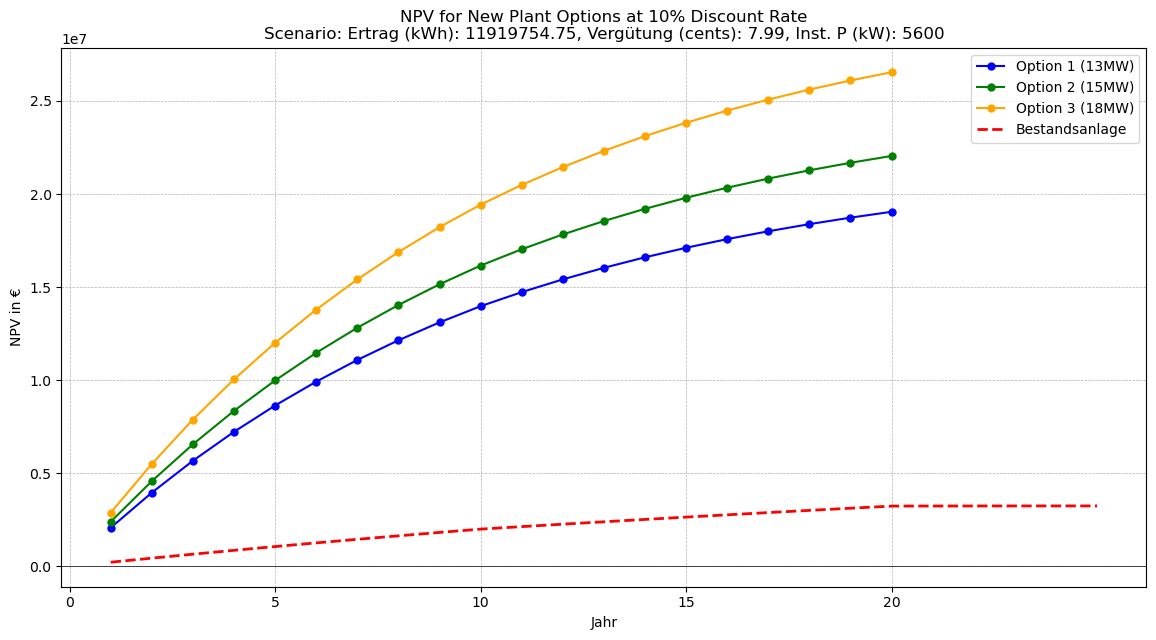

Scenario 15430892 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 13590141.26 million €
Scenario 15430892 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 16588342.04 million €
Scenario 15430892 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 21085643.21 million €


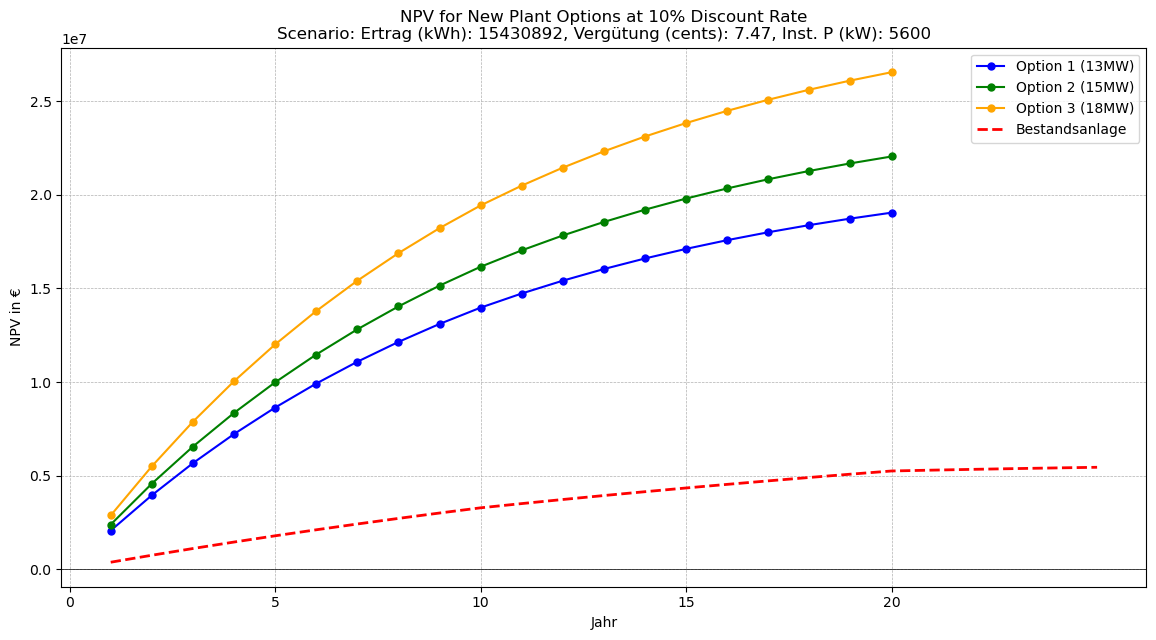

Scenario 14184911 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 14876095.90 million €
Scenario 14184911 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 17874296.68 million €
Scenario 14184911 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 22371597.85 million €


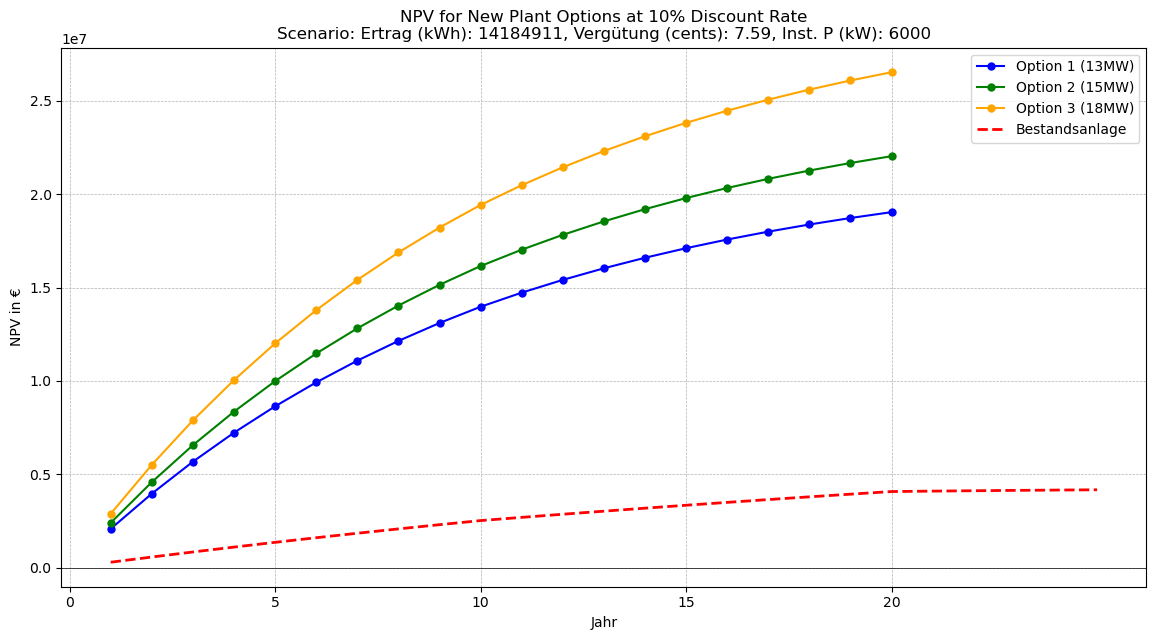

Scenario 10055505 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 15462174.57 million €
Scenario 10055505 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 18460375.35 million €
Scenario 10055505 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 22957676.52 million €


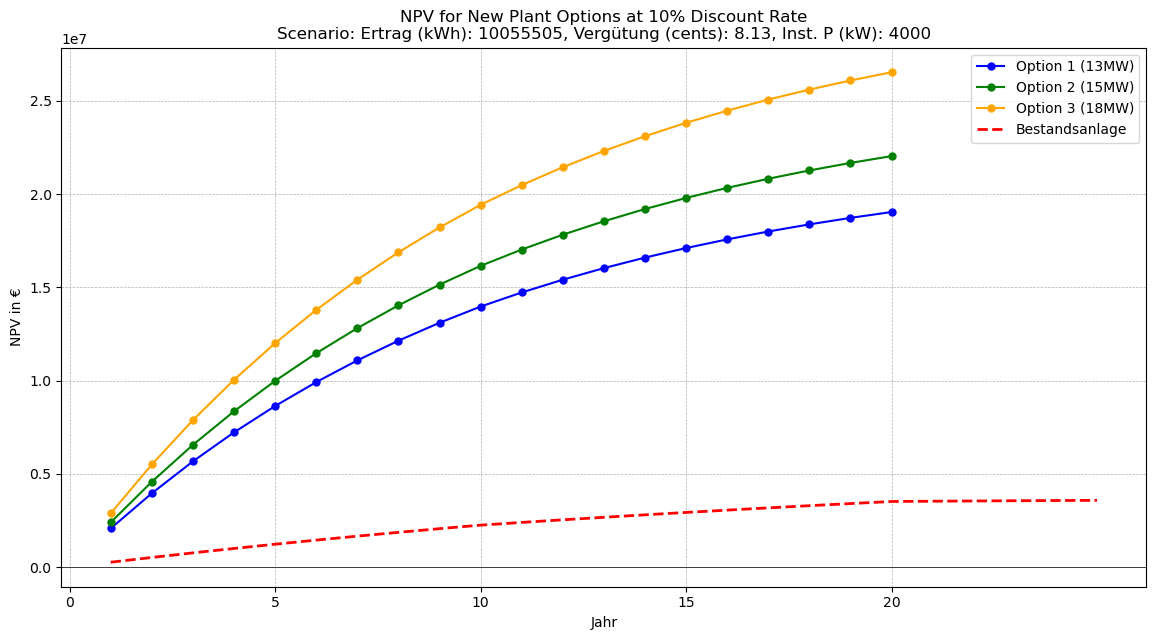

Scenario 12804968 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 12621607.98 million €
Scenario 12804968 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 15619808.76 million €
Scenario 12804968 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 20117109.93 million €


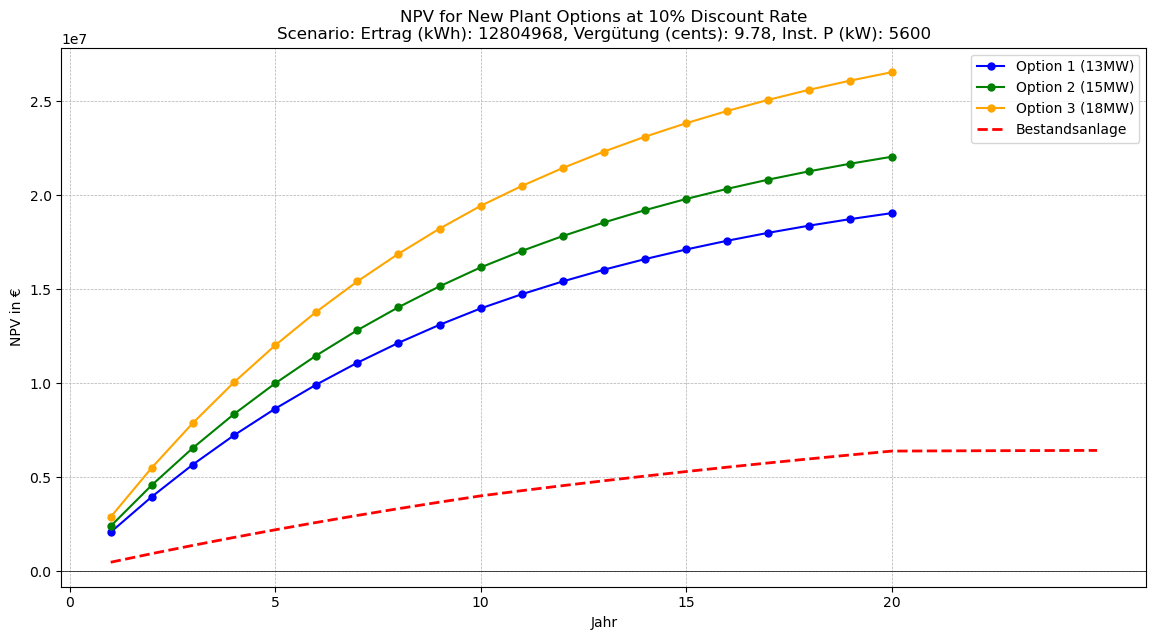

Scenario 13545000 kWh: Difference for WP1-13MW: Total NPV difference at 10% discount rate: 13931450.62 million €
Scenario 13545000 kWh: Difference for WP1-15MW: Total NPV difference at 10% discount rate: 16929651.40 million €
Scenario 13545000 kWh: Difference for WP1-18MW: Total NPV difference at 10% discount rate: 21426952.57 million €


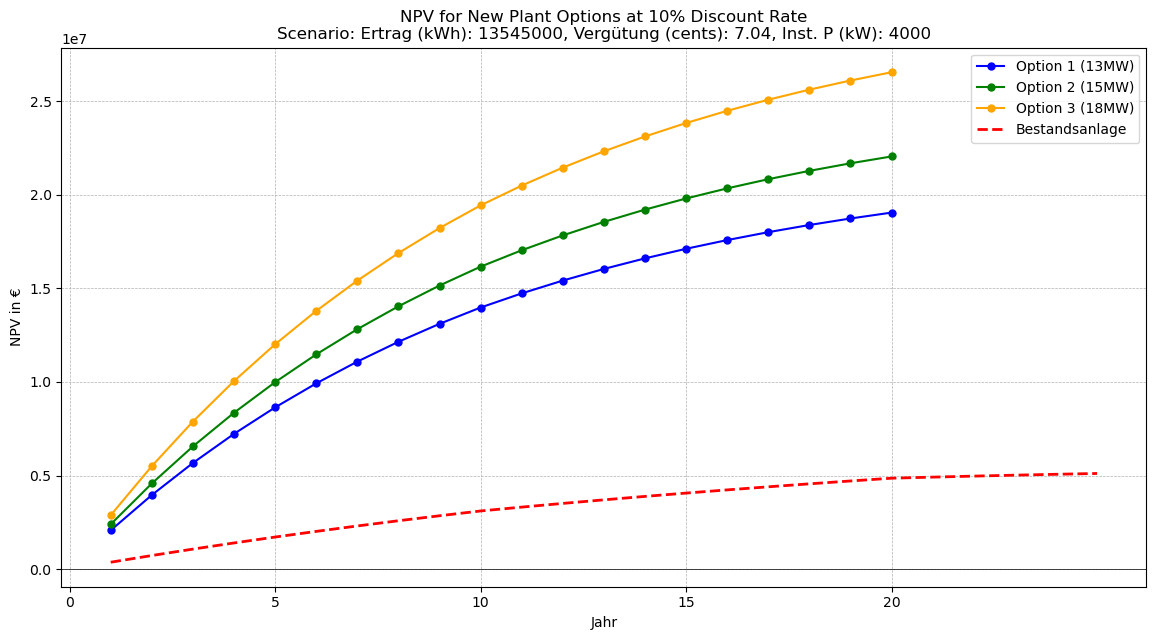

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants and initial parameters
TILGUNGSZINS = 0.032
LAUFZEIT_TILG = 19
INFLATIONSRATE = 0.02
SONSTIGE_KOSTEN = 30000
DISKONTSATZ = 0.055
DISKONTSATZ_10 = 0.1
BETRIEBSZEIT = 25
BETRIEBSZEIT_NEUANLAGE = 20
INST_P_KOSTEN_PRO_KW = 1100

# Common Derived Values Function
def calculate_derived_values(ertrag_kwh, vergütung, inst_p):
    jahreserloes = ertrag_kwh * vergütung / 100
    minuseeg51_1_10 = 0.015 * jahreserloes
    minuseeg51_11_20 = 0.025 * jahreserloes
    jahreserloes_1_10 = jahreserloes - minuseeg51_1_10
    jahreserloes_11_20 = jahreserloes - minuseeg51_11_20
    jahreserloes_21_25 = 0.045 * ertrag_kwh  # Only the 4.5 ct/kWh scenario

    anlagenpreis = inst_p * INST_P_KOSTEN_PRO_KW
    anfangsinvestition = anlagenpreis * 1.29
    eigenkapital = anfangsinvestition * 0.2
    darlehenshoehe = anfangsinvestition * 0.8

    return (jahreserloes_1_10, jahreserloes_11_20, jahreserloes_21_25, anlagenpreis, anfangsinvestition, eigenkapital, darlehenshoehe)

# Calculate interest and repayments
def berechne_zinsen_tilgungen(darlehenshoehe):
    zinsen_liste = []
    annuitaet = (darlehenshoehe * TILGUNGSZINS) / (1 - (1 + TILGUNGSZINS) ** -LAUFZEIT_TILG)
    restschuld = darlehenshoehe
    for jahr in range(1, LAUFZEIT_TILG + 1):
        tilgung = annuitaet - (restschuld * TILGUNGSZINS)
        zinsen = restschuld * TILGUNGSZINS
        restschuld -= tilgung
        zinsen_liste.append(zinsen)
    return zinsen_liste

# Common Cash Flow Calculation Function
def berechne_cashflow(jahreserloes_21_25, zinsen_liste, params, betriebszeit):
    (jahreserloes_1_10, jahreserloes_11_20, anlagenpreis, betriebskosten_1_10, wartungskosten_pro_jahr, rueckbau_kosten_11_20, provision_rueckbau, direktvermarktungskosten_pro_kwh, abschreibungen_pro_jahr) = params
    
    cashflow_liste = []
    for jahr in range(1, betriebszeit + 1):
        if jahr <= 10:
            jahreserloes_jahr = jahreserloes_1_10
            pacht_jahr = jahreserloes_1_10 * 0.05
        elif jahr <= 20:
            jahreserloes_jahr = jahreserloes_11_20
            pacht_jahr = jahreserloes_11_20 * 0.06
        else:
            jahreserloes_jahr = jahreserloes_21_25
            pacht_jahr = jahreserloes_11_20 * 0.06  # Assuming the same rate for simplicity

        zinsen_jahr = zinsen_liste[jahr - 1] if jahr <= LAUFZEIT_TILG else 0
        betriebskosten_jahr = jahreserloes_jahr * 0.044
        rueckbau_kosten_jahr = rueckbau_kosten_11_20 if 11 <= jahr <= 20 else 0
        provision_rueckbau_jahr = provision_rueckbau if 11 <= jahr <= 20 else 0
        dvk_jahr = direktvermarktungskosten_pro_kwh * (1 + INFLATIONSRATE) ** (jahr - 1)
        sonstige_jahr = SONSTIGE_KOSTEN * (1 + 0.03) ** (jahr - 1)
        wartungskosten_jahr = anlagenpreis * 0.3533 / 20

        cashflow_jahr = (jahreserloes_jahr - betriebskosten_jahr - zinsen_jahr - wartungskosten_jahr - 
                         rueckbau_kosten_jahr - provision_rueckbau_jahr - dvk_jahr - pacht_jahr - 
                         sonstige_jahr - abschreibungen_pro_jahr)
        cashflow_liste.append(cashflow_jahr)
    return cashflow_liste

# Calculate NPV for the scenario and year
def berechne_npv_jahresweise(cashflows, diskontsatz):
    npv_liste = []
    for jahr in range(1, len(cashflows) + 1):
        npv = sum(cf / (1 + diskontsatz) ** j for j, cf in enumerate(cashflows[:jahr], start=1))
        npv_liste.append(npv)
    return npv_liste

# Scenario Data
scenarios = [
    {'ertrag_kwh': 40781279 / 3, 'vergütung': 7.64, 'inst_p': 5400},
    {'ertrag_kwh': 47679019 / 4, 'vergütung': 7.99, 'inst_p': 5600},
    {'ertrag_kwh': 15430892, 'vergütung': 7.47, 'inst_p': 5600},
    {'ertrag_kwh': 14184911, 'vergütung': 7.59, 'inst_p': 6000},
    {'ertrag_kwh': 10055505, 'vergütung': 8.13, 'inst_p': 4000},
    {'ertrag_kwh': 12804968, 'vergütung': 9.78, 'inst_p': 5600},
    {'ertrag_kwh': 13545000, 'vergütung': 7.04, 'inst_p': 4000},
]

# New plant parameters and scenarios
ertrag_kwh_szenarien_neu = [36441600, 42048000, 50457600]
anlagenkapazitaeten_neu = [13, 15, 18]  # in MW
vergütung_neu = 7.35  # Compensation in cents

# Loop through each scenario
for scenario in scenarios:
    # Calculate derived values
    derived_values = calculate_derived_values(scenario['ertrag_kwh'], scenario['vergütung'], scenario['inst_p'])
    zinsen_liste = berechne_zinsen_tilgungen(derived_values[6])
    params = (derived_values[0], derived_values[1], derived_values[3], derived_values[0] * 0.044, derived_values[3] * 0.3533 / 20, 500000 / 10, 500000 / 10 * 0.1, 2.06 / 1000 * scenario['ertrag_kwh'], derived_values[3] / BETRIEBSZEIT)

    # Calculate cash flows
    cashflows_szenarien = berechne_cashflow(derived_values[2], zinsen_liste, params, BETRIEBSZEIT)

    # Calculate yearly NPVs for the existing plant
    npv_bestandsanlage = berechne_npv_jahresweise(cashflows_szenarien, DISKONTSATZ)

    cashflows_szenarien_neu = []
    npvs_szenarien_neu = []

    for i, ertrag_kwh in enumerate(ertrag_kwh_szenarien_neu):
        anlagenpreis = anlagenkapazitaeten_neu[i] * INST_P_KOSTEN_PRO_KW
        derived_values_neu = calculate_derived_values(ertrag_kwh, vergütung_neu, anlagenkapazitaeten_neu[i])
        zinsen_liste_neu = berechne_zinsen_tilgungen(derived_values_neu[6])
        params_neu = (derived_values_neu[0], derived_values_neu[1], derived_values_neu[3], derived_values_neu[0] * 0.044, derived_values_neu[3] * 0.3533 / 20, 500000 / 10, 500000 / 10 * 0.1, 2.06 / 1000 * ertrag_kwh, derived_values_neu[3] / BETRIEBSZEIT_NEUANLAGE)
        cashflows = berechne_cashflow(derived_values_neu[2], zinsen_liste_neu, params_neu, BETRIEBSZEIT_NEUANLAGE)
        cashflows_szenarien_neu.append(cashflows)

        # Calculate NPVs for the new plant options
        npv_neuanlage = berechne_npv_jahresweise(cashflows, DISKONTSATZ_10)
        npvs_szenarien_neu.append(npv_neuanlage)

    # Compare existing plant NPV with new plant options NPV
    for option, npv in enumerate(npvs_szenarien_neu):
        total_npv_difference = npv[-1] - npv_bestandsanlage[-1]
        print(f"Scenario {scenario['ertrag_kwh']} kWh: Difference for WP1-{anlagenkapazitaeten_neu[option]}MW: Total NPV difference at 10% discount rate: {total_npv_difference:.2f} million €")

    # Visualize the scenario with a discount rate of 10%
    plt.figure(figsize=(14, 7))
    farben = ['blue', 'green', 'orange']
    jahre = list(range(1, BETRIEBSZEIT_NEUANLAGE + 1))

    for option in range(3):
        differenz = npvs_szenarien_neu[option]
        plt.plot(jahre[:len(differenz)], differenz, marker='o', linestyle='-', color=farben[option], markersize=5,
                 label=f"Option {option + 1} ({anlagenkapazitaeten_neu[option]}MW)")

    # Highlight the NPV of the existing plant
    plt.plot(range(1, BETRIEBSZEIT + 1), npv_bestandsanlage, label="Bestandsanlage", color='red', linestyle='--', linewidth=2)
    
    plt.xlabel('Jahr')
    plt.ylabel('NPV in €')
    plt.title(f'NPV for New Plant Options at 10% Discount Rate\nScenario: Ertrag (kWh): {scenario["ertrag_kwh"]}, Vergütung (cents): {scenario["vergütung"]}, Inst. P (kW): {scenario["inst_p"]}')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(range(0, BETRIEBSZEIT_NEUANLAGE + 1, 5))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.show()


In [20]:
# Constants and initial parameters
TILGUNGSZINS = 0.032
LAUFZEIT_TILG = 19
INFLATIONSRATE = 0.02
SONSTIGE_KOSTEN = 30000
DISKONTSATZ = 0.055
DISKONTSATZ_10 = 0.1
BETRIEBSZEIT = 25
BETRIEBSZEIT_NEUANLAGE = 20
INST_P_KOSTEN_PRO_KW = 1100

# Common Derived Values Function
def calculate_derived_values(ertrag_kwh, vergütung, inst_p):
    jahreserloes = ertrag_kwh * vergütung / 100
    minuseeg51_1_10 = 0.015 * jahreserloes
    minuseeg51_11_20 = 0.025 * jahreserloes
    jahreserloes_1_10 = jahreserloes - minuseeg51_1_10
    jahreserloes_11_20 = jahreserloes - minuseeg51_11_20
    jahreserloes_21_25 = 0.045 * ertrag_kwh  # Only the 4.5 ct/kWh scenario

    anlagenpreis = inst_p * INST_P_KOSTEN_PRO_KW
    anfangsinvestition = anlagenpreis * 1.29
    eigenkapital = anfangsinvestition * 0.2
    darlehenshoehe = anfangsinvestition * 0.8

    return (jahreserloes_1_10, jahreserloes_11_20, jahreserloes_21_25, anlagenpreis, anfangsinvestition, eigenkapital, darlehenshoehe)

# Calculate interest and repayments
def berechne_zinsen_tilgungen(darlehenshoehe):
    zinsen_liste = []
    annuitaet = (darlehenshoehe * TILGUNGSZINS) / (1 - (1 + TILGUNGSZINS) ** -LAUFZEIT_TILG)
    restschuld = darlehenshoehe
    for jahr in range(1, LAUFZEIT_TILG + 1):
        tilgung = annuitaet - (restschuld * TILGUNGSZINS)
        zinsen = restschuld * TILGUNGSZINS
        restschuld -= tilgung
        zinsen_liste.append(zinsen)
    return zinsen_liste

# Common Cash Flow Calculation Function
def berechne_cashflow(jahreserloes_21_25, zinsen_liste, params, betriebszeit):
    (jahreserloes_1_10, jahreserloes_11_20, anlagenpreis, betriebskosten_1_10, wartungskosten_pro_jahr, rueckbau_kosten_11_20, provision_rueckbau, direktvermarktungskosten_pro_kwh, abschreibungen_pro_jahr) = params
    
    cashflow_liste = []
    for jahr in range(1, betriebszeit + 1):
        if jahr <= 10:
            jahreserloes_jahr = jahreserloes_1_10
            pacht_jahr = jahreserloes_1_10 * 0.05
        elif jahr <= 20:
            jahreserloes_jahr = jahreserloes_11_20
            pacht_jahr = jahreserloes_11_20 * 0.06
        else:
            jahreserloes_jahr = jahreserloes_21_25
            pacht_jahr = jahreserloes_11_20 * 0.06  # Assuming the same rate for simplicity

        zinsen_jahr = zinsen_liste[jahr - 1] if jahr <= LAUFZEIT_TILG else 0
        betriebskosten_jahr = jahreserloes_jahr * 0.044
        rueckbau_kosten_jahr = rueckbau_kosten_11_20 if 11 <= jahr <= 20 else 0
        provision_rueckbau_jahr = provision_rueckbau if 11 <= jahr <= 20 else 0
        dvk_jahr = direktvermarktungskosten_pro_kwh * (1 + INFLATIONSRATE) ** (jahr - 1)
        sonstige_jahr = SONSTIGE_KOSTEN * (1 + 0.03) ** (jahr - 1)
        wartungskosten_jahr = anlagenpreis * 0.3533 / 20

        cashflow_jahr = (jahreserloes_jahr - betriebskosten_jahr - zinsen_jahr - wartungskosten_jahr - 
                         rueckbau_kosten_jahr - provision_rueckbau_jahr - dvk_jahr - pacht_jahr - 
                         sonstige_jahr - abschreibungen_pro_jahr)
        cashflow_liste.append(cashflow_jahr)
    return cashflow_liste

# Calculate NPV for the scenario and year
def berechne_npv_jahresweise(cashflows, diskontsatz):
    npv_liste = []
    for jahr in range(1, len(cashflows) + 1):
        npv = sum(cf / (1 + diskontsatz) ** j for j, cf in enumerate(cashflows[:jahr], start=1))
        npv_liste.append(npv)
    return npv_liste

# Scenario Data
scenarios = [
    {'ertrag_kwh': 10055505, 'vergütung': 8.13, 'inst_p': 4000},
    {'ertrag_kwh': 13545000, 'vergütung': 7.04, 'inst_p': 4000},
]

# New plant parameters and scenarios
ertrag_kwh_szenarien_neu = [36441600, 42048000, 50457600]
anlagenkapazitaeten_neu = [13, 15, 18]  # in MW
vergütung_neu = 7.35  # Compensation in cents

# Loop through each scenario
for scenario in scenarios:
    # Calculate derived values
    derived_values = calculate_derived_values(scenario['ertrag_kwh'], scenario['vergütung'], scenario['inst_p'])
    zinsen_liste = berechne_zinsen_tilgungen(derived_values[6])
    params = (derived_values[0], derived_values[1], derived_values[3], derived_values[0] * 0.044, derived_values[3] * 0.3533 / 20, 500000 / 10, 500000 / 10 * 0.1, 2.06 / 1000 * scenario['ertrag_kwh'], derived_values[3] / BETRIEBSZEIT)

    # Calculate cash flows
    cashflows_szenarien = berechne_cashflow(derived_values[2], zinsen_liste, params, BETRIEBSZEIT)

    # Calculate yearly NPVs for the existing plant
    npv_bestandsanlage = berechne_npv_jahresweise(cashflows_szenarien, DISKONTSATZ)

    cashflows_szenarien_neu = []
    npvs_szenarien_neu = []

    for i, ertrag_kwh in enumerate(ertrag_kwh_szenarien_neu):
        anlagenpreis = anlagenkapazitaeten_neu[i] * INST_P_KOSTEN_PRO_KW
        derived_values_neu = calculate_derived_values(ertrag_kwh, vergütung_neu, anlagenkapazitaeten_neu[i])
        zinsen_liste_neu = berechne_zinsen_tilgungen(derived_values_neu[6])
        params_neu = (derived_values_neu[0], derived_values_neu[1], derived_values_neu[3], derived_values_neu[0] * 0.044, derived_values_neu[3] * 0.3533 / 20, 500000 / 10, 500000 / 10 * 0.1, 2.06 / 1000 * ertrag_kwh, derived_values_neu[3] / BETRIEBSZEIT_NEUANLAGE)
        cashflows = berechne_cashflow(derived_values_neu[2], zinsen_liste_neu, params_neu, BETRIEBSZEIT_NEUANLAGE)
        cashflows_szenarien_neu.append(cashflows)

        # Calculate NPVs for the new plant options
        npv_neuanlage = berechne_npv_jahresweise(cashflows, DISKONTSATZ_10)
        npvs_szenarien_neu.append(npv_neuanlage)

    # Compare existing plant NPV with new plant options NPV at year 11
    for option, npv in enumerate(npvs_szenarien_neu):
        if len(npv) >= 11 and len(npv_bestandsanlage) >= 11:
            npv_difference_year_11 = npv[10] - npv_bestandsanlage[10]
            print(f"NPV-Differenz im Jahr 11 für Szenario mit {scenario['ertrag_kwh']} kWh und Neuanlage {anlagenkapazitaeten_neu[option]} MW: {npv_difference_year_11:.2f} €")


NPV-Differenz im Jahr 11 für Szenario mit 10055505 kWh und Neuanlage 13 MW: 12330219.56 €
NPV-Differenz im Jahr 11 für Szenario mit 10055505 kWh und Neuanlage 15 MW: 14633160.65 €
NPV-Differenz im Jahr 11 für Szenario mit 10055505 kWh und Neuanlage 18 MW: 18087572.29 €
NPV-Differenz im Jahr 11 für Szenario mit 13545000 kWh und Neuanlage 13 MW: 11412742.52 €
NPV-Differenz im Jahr 11 für Szenario mit 13545000 kWh und Neuanlage 15 MW: 13715683.61 €
NPV-Differenz im Jahr 11 für Szenario mit 13545000 kWh und Neuanlage 18 MW: 17170095.25 €
